<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_2/AST_Clase_2_ejercicio_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

import warnings
warnings.filterwarnings('ignore')

Leemos los datos a trabajar


In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/series.csv'
data = pd.read_csv(url)

In [ ]:
data['date'] = pd.to_datetime(data['date']) 
data.index = data['date'] 
del data['date']

In [ ]:
data.head()

,x1,x2,x3,x4,x5,x6
date,,,,,,
2021-11-28,0.342683,0.314053,-1.252540,-1.132005,0.167948,-1.695945
2021-11-29,0.116514,-0.308586,-0.467313,-1.219225,0.578596,1.053678
2021-11-30,2.022962,-0.622566,-0.661624,-0.315990,0.190004,-0.694621
2021-12-01,2.688268,0.409142,0.326447,-0.816178,0.043774,0.969021
2021-12-02,1.957165,0.889654,0.936160,-0.608075,2.027328,0.681321


In [ ]:
data.drop('x1', inplace=True, axis=1)
data.drop('x2', inplace=True, axis=1)
data.drop('x4', inplace=True, axis=1)
data.drop('x5', inplace=True, axis=1)
data.drop('x6', inplace=True, axis=1)

In [ ]:
data.head()

,x3
date,
2021-11-28,-1.252540
2021-11-29,-0.467313
2021-11-30,-0.661624
2021-12-01,0.326447
2021-12-02,0.936160


In [ ]:
result = type(data)
print(result)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.describe()

,x3
count,200.000000
mean,-0.056402
std,1.130699
min,-3.087717
25%,-0.782633
50%,-0.196231
75%,0.732845
max,3.132708


Text(0.5, 1.0, 'Histograma de la Serie')

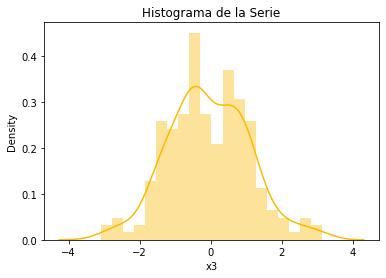

In [ ]:
sns.distplot(data.x3,bins=20,color='#fcba03')
plt.title('Histograma de la Serie')

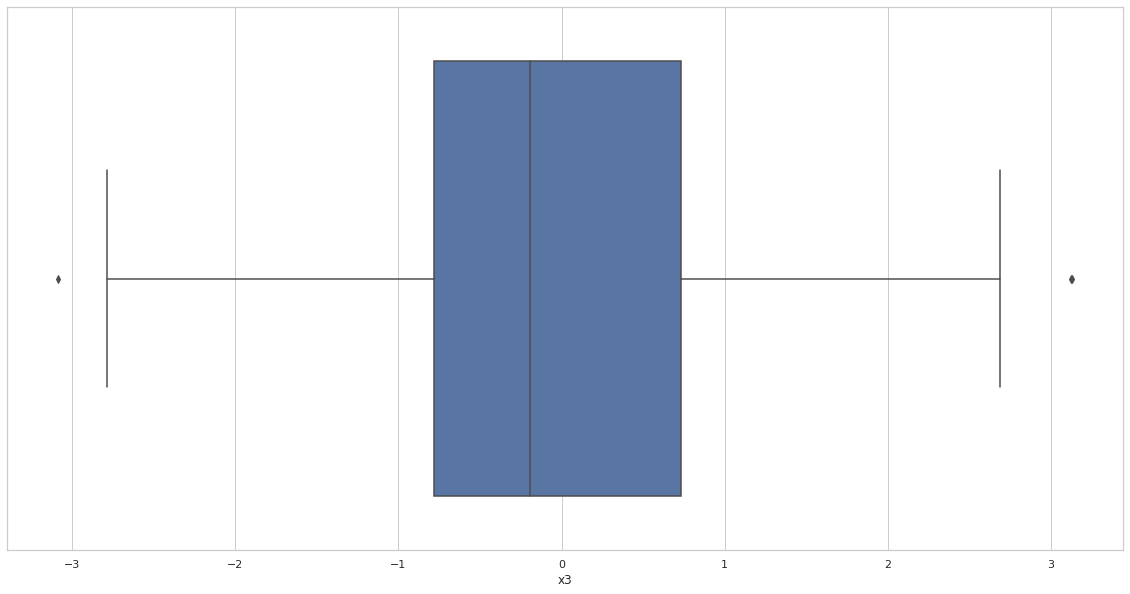

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=data.x3)

In [ ]:
import scipy.stats
import pylab

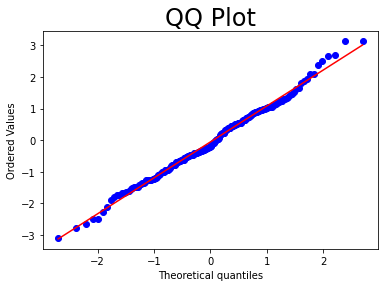

In [ ]:
scipy.stats.probplot(data.x3, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

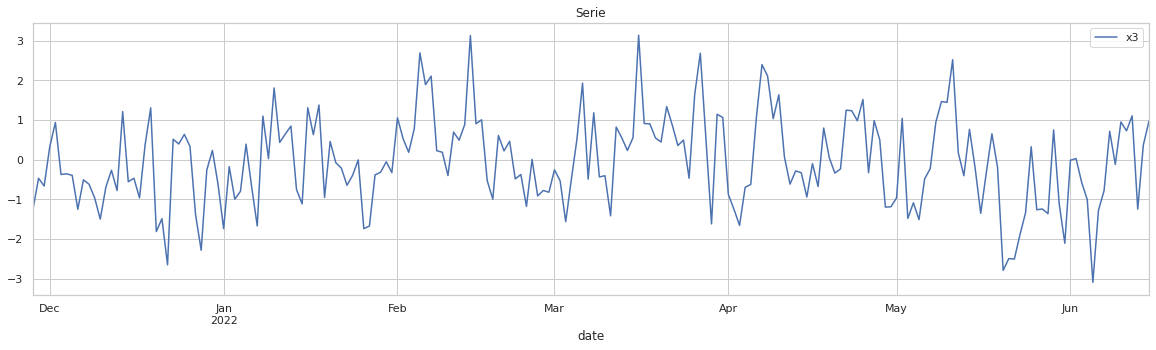

In [ ]:
data.plot(figsize=(20,5), title = "Serie")
plt.show()

In [ ]:
data_diff=data.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)
data_diff.drop(['2021-11-28	'], inplace=True)

In [ ]:
data_diff

,x3
date,
2021-11-29,0.785227
2021-11-30,-0.194312
2021-12-01,0.988072
2021-12-02,0.609713
2021-12-03,-1.307880
...,...
2022-06-11,-0.222390
2022-06-12,0.377399
2022-06-13,-2.348325


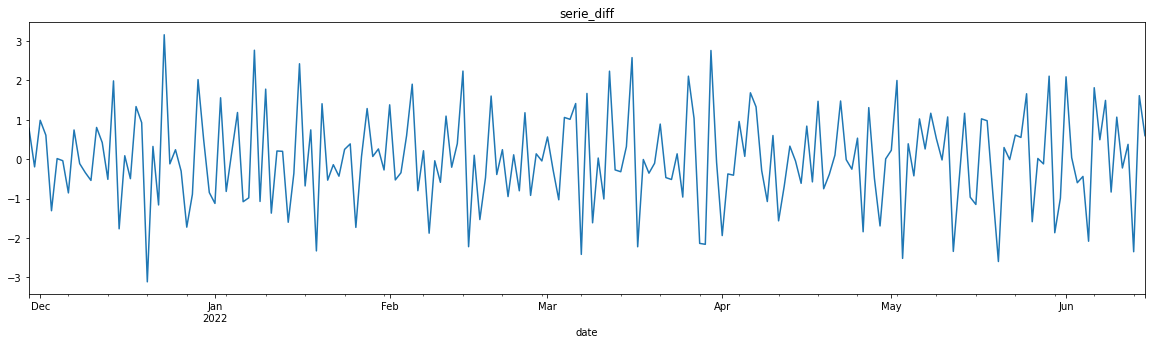

In [ ]:
data_diff.x3.plot(figsize=(20,5), title = "serie_diff")
plt.show()

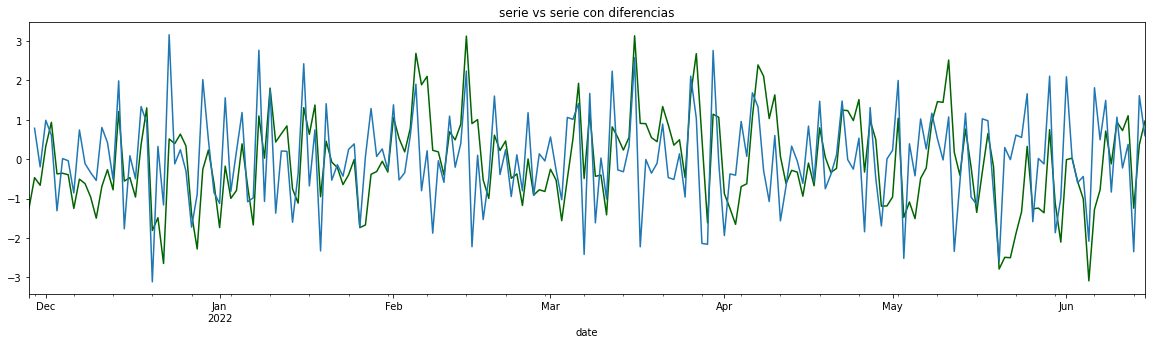

In [ ]:
data.x3.plot(figsize=(20,5),color='darkgreen' )
data_diff.x3.plot(figsize=(20,5))
plt.title("serie vs serie con diferencias")
plt.show()

# Graficos serie original

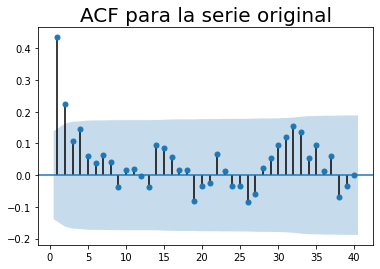

In [ ]:
sgt.plot_acf(data.x3, zero = False, lags = 40)
plt.title("ACF para la serie original", size = 20)
plt.show()

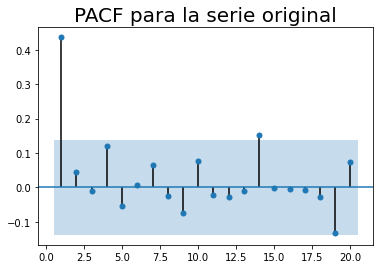

In [ ]:
sgt.plot_pacf(data.x3, lags = 20, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

# Graficos serie original diferenciada

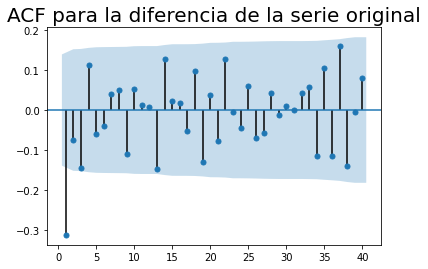

In [ ]:
sgt.plot_acf(data_diff.x3, zero = False, lags = 40)
plt.title("ACF para la diferencia de la serie original", size = 20)
plt.show()

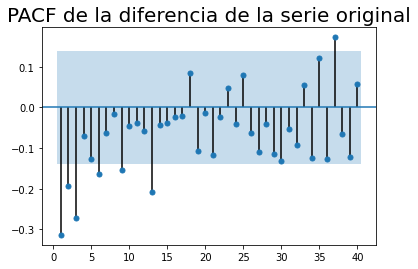

In [ ]:
sgt.plot_pacf(data_diff.x3, lags = 40, alpha = 0.05, zero = False)
plt.title("PACF de la diferencia de la serie original", size = 20)
plt.show()

Modelo Autorregresivo de orden 1

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
modelo_ar = ARMA(data.x3, order=(1,0))
resultos_ar = modelo_ar.fit()

In [ ]:
resultos_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     x3   No. Observations:                  200
Model:                     ARMA(1, 0)   Log Likelihood                -286.752
Method:                       css-mle   S.D. of innovations              1.014
Date:                Tue, 21 Jun 2022   AIC                            579.503
Time:                        23:41:56   BIC                            589.398
Sample:                    11-28-2021   HQIC                           583.508
                         - 06-15-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0571      0.127     -0.450      0.654      -0.306       0.192
ar.L1.x3       0.4371      0.064      6.865      0.000       0.312       0.562
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2878           +0.0000j            2.2878            0.0000
-----------------------------------------------------------------------------
"""

Comentarios =

- La columna de coeficientes representa los valores numéricos asociados con C y "phi-uno" de nuestro modelo AR(1) <br>
- La columna de error estándar = es una medida de qué tan lejos, en promedio, las predicciones de los modelos son de los valores verdaderos <br>

Presentacion de los residuos del modelo

In [ ]:
data['resid'] = resultos_ar.resid

In [ ]:
data.resid.mean()

0.002612626391726911

In [ ]:
data.resid.var()

1.0355286466836657

In [ ]:
data.head()

,x3,resid
date,,
2021-11-28,-1.252540,-1.195475
2021-11-29,-0.467313,0.112287
2021-11-30,-0.661624,-0.425243
2021-12-01,0.326447,0.647761
2021-12-02,0.936160,0.825593


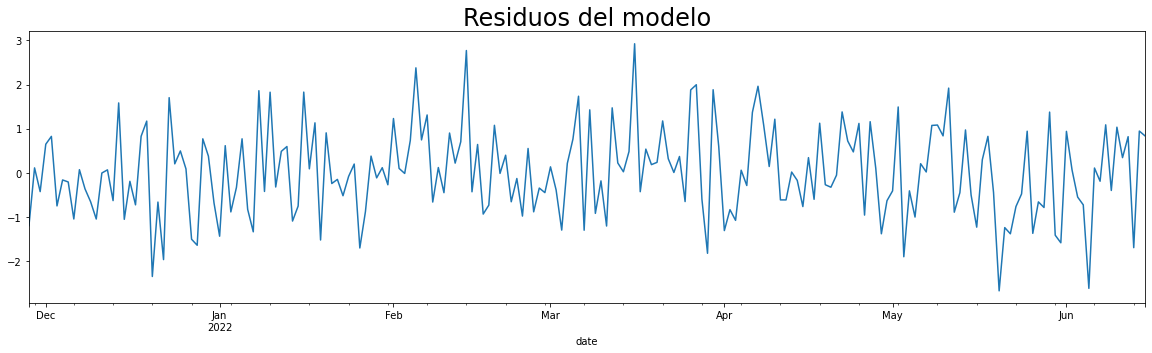

In [ ]:
data.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

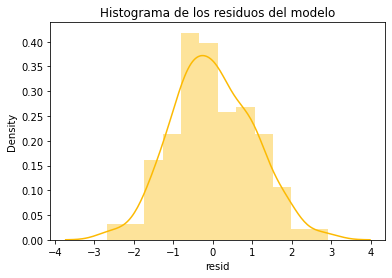

In [ ]:
sns.distplot(data.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

*Prueba* Ljung-Box

In [ ]:
import statsmodels.api as sm

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(data.resid, lags=50)

In [ ]:
Incorr_residuos_modelo

(array([ 0.08002926,  0.43409379,  0.89775324,  4.08591819,  4.09685457,
         4.11425637,  4.65960483,  5.12072252,  6.62265938,  6.87544698,
         6.91985222,  6.92195037,  9.33244823, 12.14016864, 12.59751239,
        12.74496551, 12.83606991, 13.748358  , 16.49541604, 16.49868802,
        17.27460441, 19.97558308, 19.97631591, 20.34923049, 20.37648546,
        21.80499163, 22.61384966, 22.9138195 , 22.98983379, 23.44071634,
        23.85955046, 25.64929374, 27.57635498, 28.0616842 , 30.50844011,
        31.42667715, 35.1305965 , 38.30431313, 38.35335846, 38.99384322,
        39.5429691 , 39.56702233, 41.58090657, 41.59323485, 41.60445469,
        43.97451329, 44.00044997, 44.12880548, 44.24552239, 44.54637819]),
 array([0.77725776, 0.80489222, 0.82596997, 0.39450295, 0.5355573 ,
        0.66121764, 0.70142265, 0.74459868, 0.67633968, 0.73714889,
        0.80553638, 0.86272798, 0.74739736, 0.59504715, 0.63335458,
        0.69130561, 0.7470891 , 0.74534191, 0.62401056, 0.685244

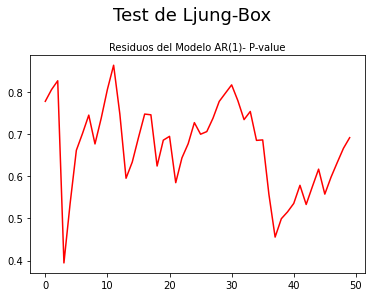

In [ ]:
plt.title("Residuos del Modelo AR(1)- P-value", fontsize=10)
plt.suptitle("Test de Ljung-Box", y=1.05, fontsize=18)

plt.plot(Incorr_residuos_modelo[1], color="red")

plt.show()

# **¡Muchas gracias por su atencion!** 😀
